In [87]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from pandas.tseries.offsets import DateOffset

In [88]:
# Loading the files to Dataframes
CompleteSales=pd.read_csv("E:/Data/Sales.csv")
CompleteOrders=pd.read_csv("E:/Data/Orders.csv")
Products=pd.read_csv("E:/Data/Products.csv",encoding='latin-1')
Category=pd.read_csv("E:/Data/Category.csv")
Design=pd.read_csv("E:/Data/Design.csv")
Type=pd.read_csv("E:/Data/Type.csv")
Ruling=pd.read_csv("E:/Data/Ruling.csv")

#Checking the files
print(CompleteSales.columns)

Index(['Sales_no', 'Sales_date', 'Product_id', 'Category_name',
       'CategoryDesign_name', 'Type_name', 'Ruling_name', 'Qty_Sold',
       'Total_Sales_Value', 'Zone_name'],
      dtype='object')


       Date  Sales
0  1/1/2017   7871
1  1/1/2017   8830
2  1/1/2017   2843
3  1/1/2017   9790
4  1/1/2017   6737


C:\Users\Manimaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


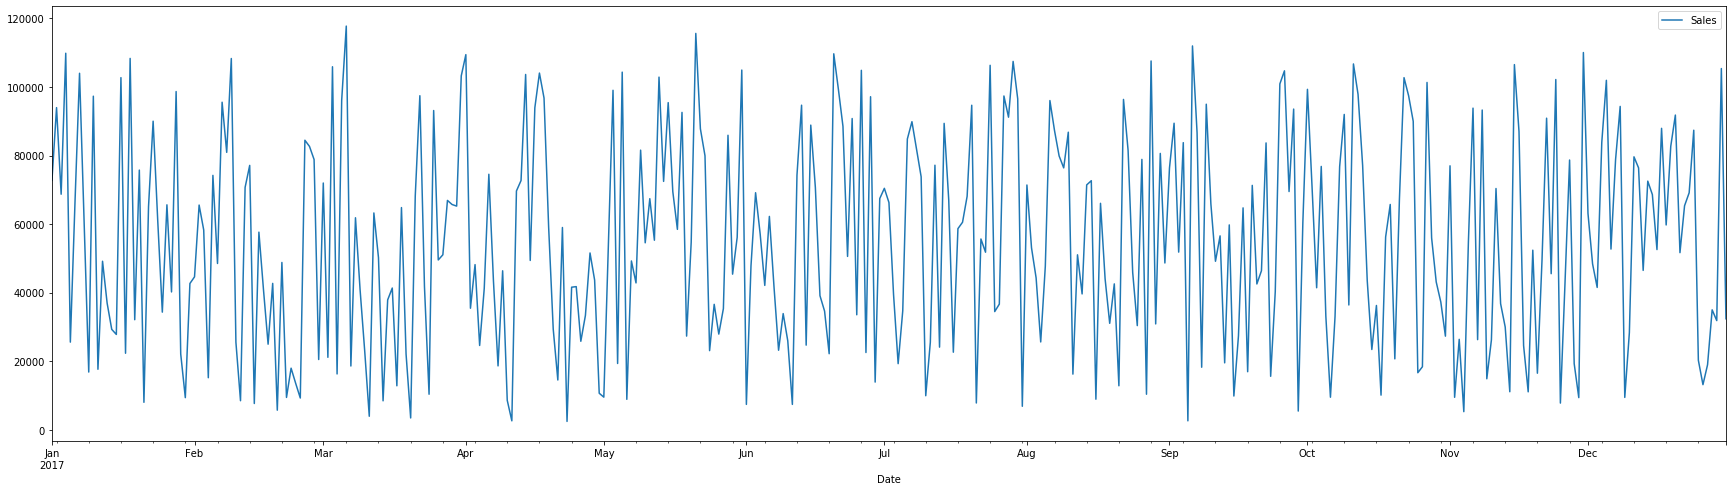

In [89]:
# SaleDate vs TotalSalesValue
DateVsSale=CompleteSales[['Sales_date','Total_Sales_Value']]
DateVsSale.columns=['Date','Sales']
print(DateVsSale.head(5))
DateVsSale['Date']=pd.to_datetime(DateVsSale['Date'])
#Aggregarting Sale Values grouped by date
DateVsSale=DateVsSale.groupby(DateVsSale['Date']).sum()
DateVsSale.plot(figsize=(30,8))

C:\Users\Manimaran\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


             Sales      Forecast
Date                            
2017-12-22   65351  62283.001500
2017-12-23   69132  66573.704241
2017-12-24   87389  41513.577860
2017-12-25   20261  29964.615199
2017-12-26   13141  76971.156538
2017-12-27   18955  44451.354928
2017-12-28   34972  62697.196657
2017-12-29   31834  49447.666652
2017-12-30  105386  47771.221790
2017-12-31   32357  73138.947548


,Sales,Forecast
2018-01-01,NaN,NaN
2018-01-02,NaN,NaN
2018-01-03,NaN,NaN
2018-01-04,NaN,NaN
2018-01-05,NaN,NaN
...,...,...
2018-12-26,NaN,NaN
2018-12-27,NaN,NaN
2018-12-28,NaN,NaN
2018-12-29,NaN,NaN


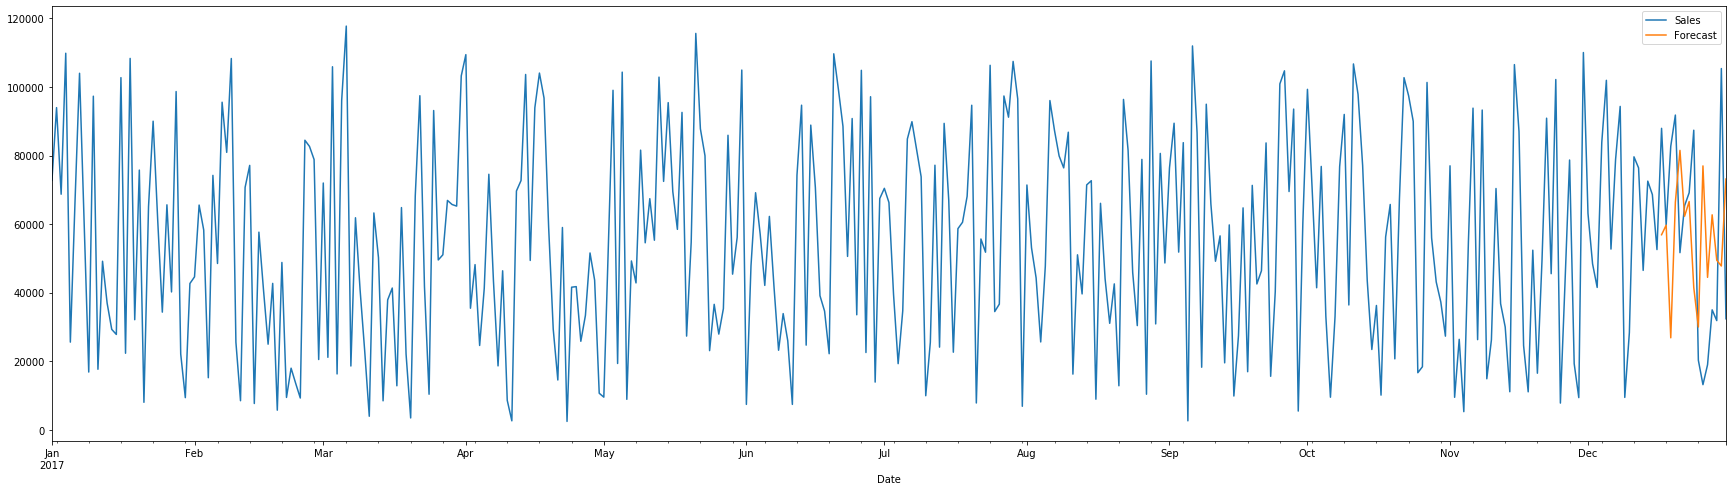

In [92]:
Model=sm.tsa.statespace.SARIMAX(DateVsSale['Sales'],order=(1, 0, 0),seasonal_order=(1,1,1,60))
Result=Model.fit()
DateVsSale['Forecast']=Result.predict(start=350,end=365,dynamic=True)
print(DateVsSale.tail(10))
DateVsSale[['Sales','Forecast']].plot(figsize=(30,8))
FutureDates=[DateVsSale.index[-1]+ DateOffset(n=x)for x in range(0,365)]
FutureDatesDF=pd.DataFrame(index=FutureDates[1:],columns=DateVsSale.columns)
FutureDatesDF

In [91]:
FutureDatesVsSale=[DateVsSale.index[-1]+ DateOffset(n=x)for x in range(0,365)]
FutureDatesVsSaleDF=pd.DataFrame(index=FutureDatesVsSale[1:],columns=DateVsSale.columns)
FutureDatesDF


,Sales,Forecast
2018-01-01,NaN,NaN
2018-01-02,NaN,NaN
2018-01-03,NaN,NaN
2018-01-04,NaN,NaN
2018-01-05,NaN,NaN
...,...,...
2018-12-26,NaN,NaN
2018-12-27,NaN,NaN
2018-12-28,NaN,NaN
2018-12-29,NaN,NaN
